In [121]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import contractions
import collections
import wordcount
import seaborn as sns

subreddit = 'conspiracy'
type_of_content = 'submissions'
column = 'title'
filename = f'{subreddit}_{type_of_content}_filtered.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename, compression='gzip')
dataframe.head()

,author,title
0,AmericanExpat76,Strange tales to overcome the boring weekend
1,Magikal-24,The Earth is a Macrocosm of the Testicle.
2,RaoulDuke209,"Let’s have some light-hearted fun, let’s perfo..."
3,throwaway79644,Why is no one protesting the world economic fo...
4,LigmaBalls-420,Anybody have any good Vatican conspiracy theor...


In [122]:
comments = dataframe[column]

#textfile = open(f"{subreddit}_{type_of_content}_cleaned.txt", "w")
preprocessed_comments = []

for comment in comments:
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",comment)
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = " ".join(contractions.fix(word) for word in comment.split())
    comment = " ".join(word for word in comment.split() if word not in stop)

    comment = re.sub(r"[^0-9A-Za-z \t]","",comment)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    preprocessed_comments.append(comment)


* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning


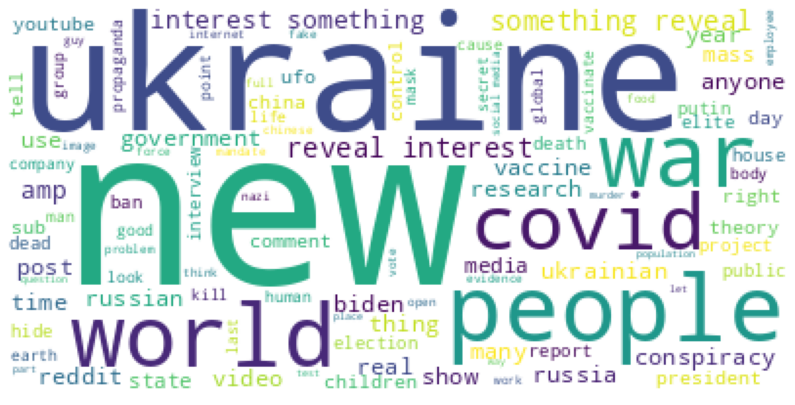

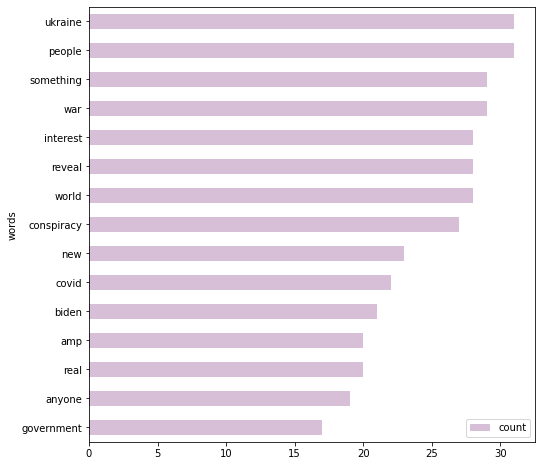

In [123]:
wordcloud_text = ''
frequency = []

for comment in preprocessed_comments:
    pos = nltk.pos_tag(comment)
    for word in pos:
        if word[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}:
            wordcloud_text = wordcloud_text + word[0] + ' '
            frequency.append(word[0])

wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis("off")
plt.imshow(wc)
plt.savefig(f'{subreddit}_wordcloud.png')

word_frequency = collections.Counter(frequency)
word_frequency.most_common(15)
word_frequency = pd.DataFrame(word_frequency.most_common(15), columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
word_frequency.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="thistle")
plt.show()

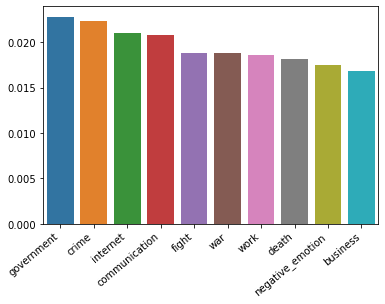

In [124]:
empath_results = lexicon.analyze(frequency, normalize=True)
empath_results = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

top_ten = dict(list(empath_results)[:10])
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=labels, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
plt.savefig(f'{subreddit}_empath.png')
